In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio   
import pickle
import scipy.signal
from tqdm.notebook import tqdm, trange
from scipy.special import erfc

from optic.comm.modulation import modulateGray, demodulateGray, GrayMapping
from optic.dsp.core import firFilter, pulseShape, lowPassFIR, pnorm, upsample
from optic.comm.metrics import signal_power
from optic.plot import eyediagram
from optic.utils import parameters
from optic.models.devices import mzm
plt.rcParams["figure.figsize"] = (12,6)

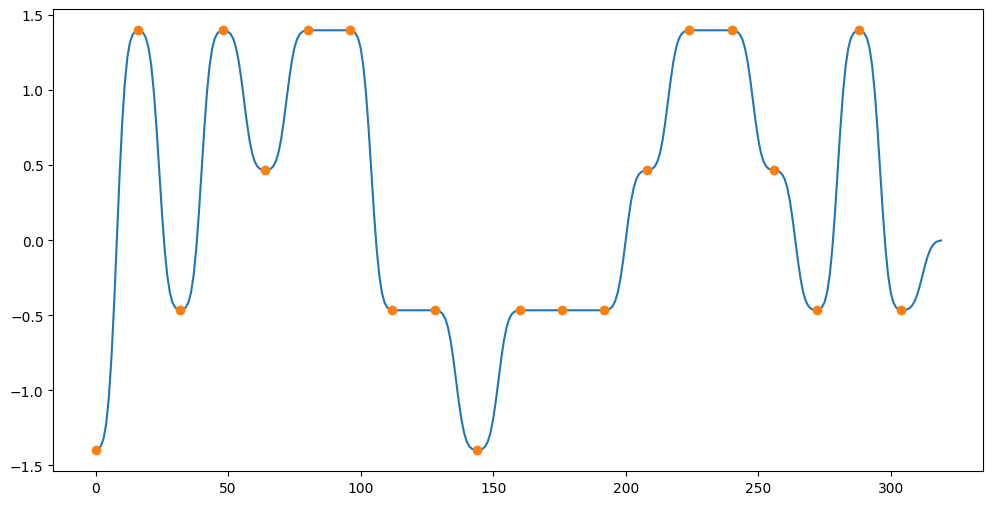

In [37]:
def plotSemZeros(array):
     return [float('nan') if x==0 else x for x in array]
#Valores Geração do sinal
M = 4 # order of the modulation format
nsimbolos = 20
SPS = 16
formatoPulso = 'nrz' #'rect','nrz','rrc'
nTaps = 1024
alpha = 0.1


# Geração de simbolos
bits = np.random.randint(0,2,int(nsimbolos*np.log2(M)))
#bits = np.array([0,0,0,0,0,1,0,1,1,0,1,0,1,1,0,1,1,1,1,0,1,1,0,0])
simbolos = modulateGray(bits, M, 'pam')
simbolos = pnorm(simbolos)

# Fomartação de pulso
simbolosup = upsample(simbolos, SPS)
pulso = pulseShape(formatoPulso, SPS, nTaps, alpha)
pulso = pulso/max(abs(pulso))
sinal = firFilter(pulso, simbolosup)
sinal = sinal.real
plt.plot(sinal)

plt.plot(plotSemZeros(simbolosup),'o')

In [86]:
param = parameters
param.Vpi = 6.01
param.Vb = 0

v = np.linspace(0,param.Vpi,10000) 
modulador = mzm(np.ones(10000),v,param)

M = 4
simbolosDistintos = np.linspace(-1, 1, M)
simbolosDistorcidos = np.flip(np.interp(np.linspace(-1,0,M),-modulador,v))
# -1->0 / -0.33->0.33 / 0.33->0.66 / 1->1




array([6.01      , 4.70975515, 3.21800008, 0.        ])

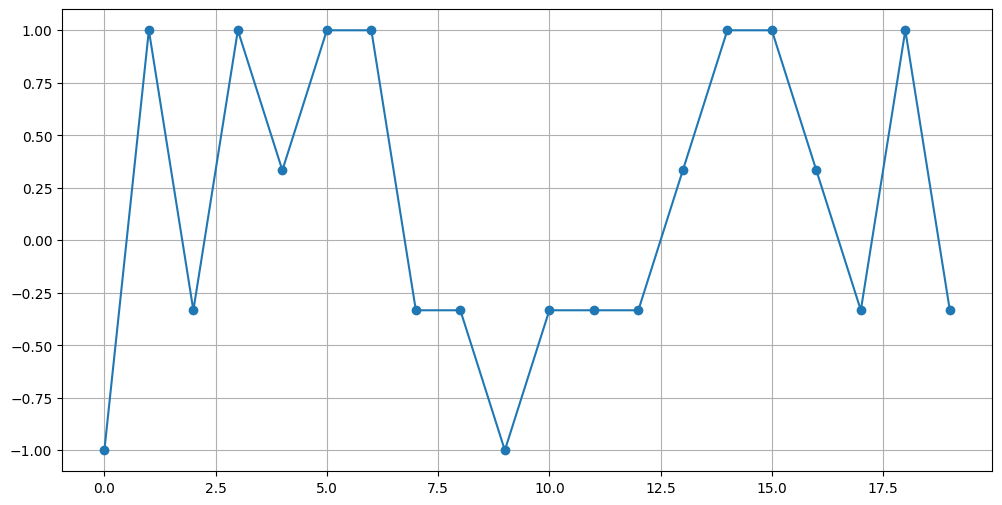

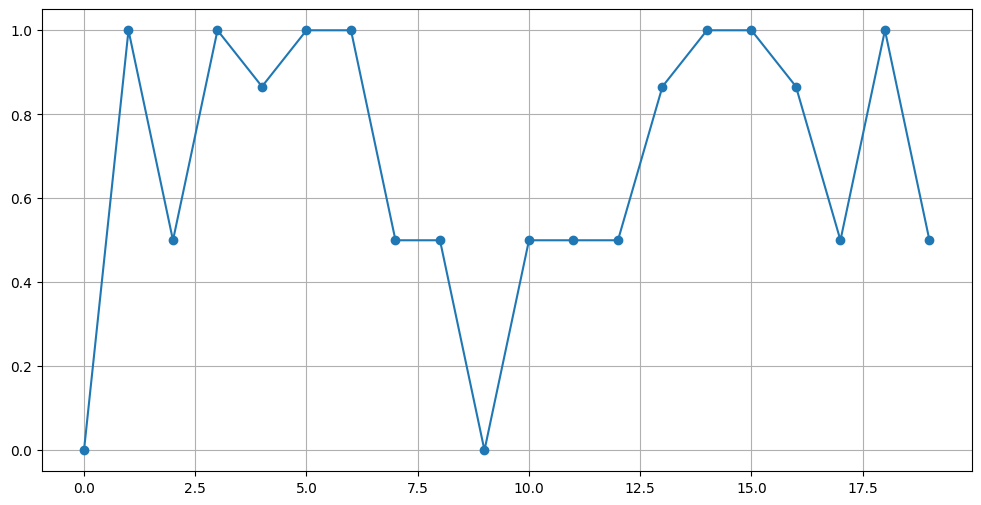

In [57]:
param = parameters
param.Vpi = 6.01
param.Vb = -6.01/2




#simbolosbackup = simbolos
simbolos = simbolosbackup
simbolos = simbolos
simbolos = simbolos/max(simbolos)

plt.plot(simbolos,'o-')
plt.grid()
plt.figure(2)
modulado = mzm(np.ones(len(simbolos)),simbolos*param.Vpi/2,param)
plt.plot(modulado,'o-')
plt.grid()

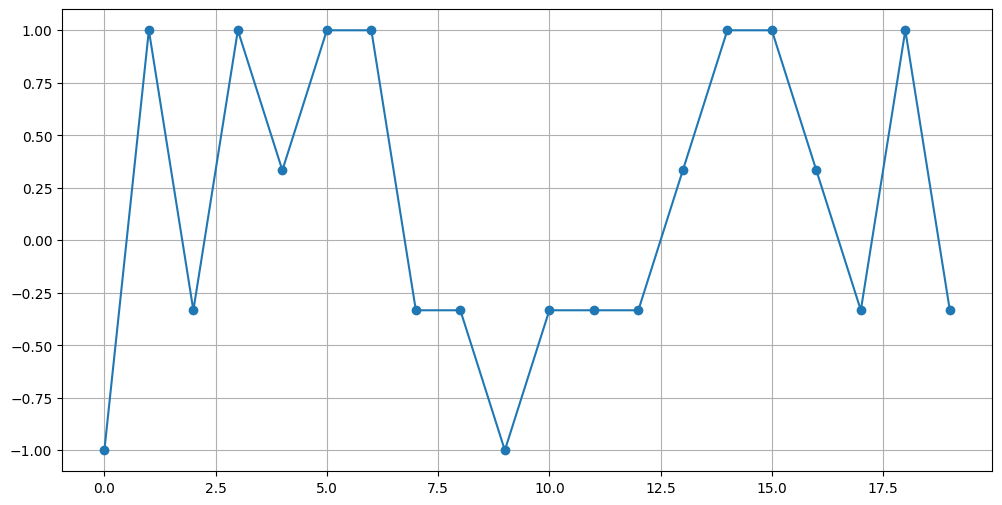

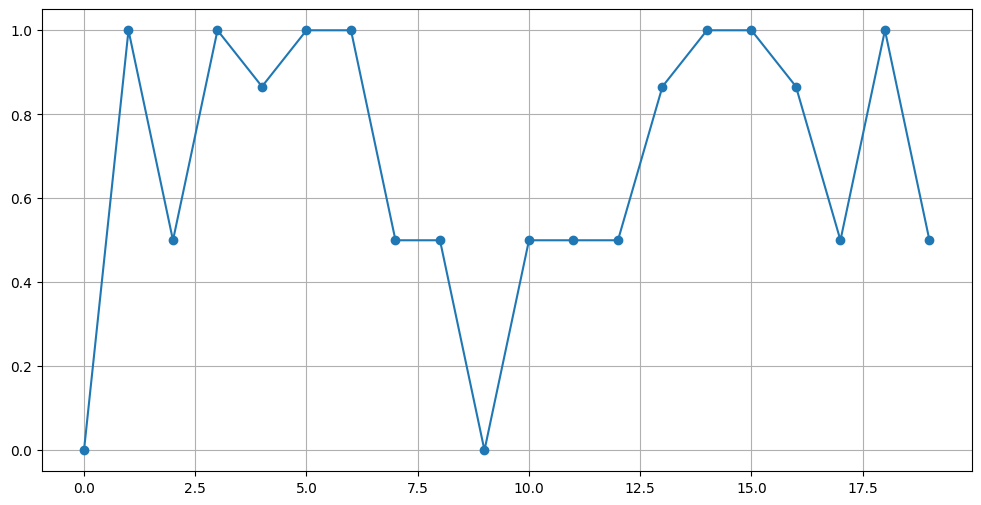

In [60]:
param = parameters
param.Vpi = 6.01
param.Vb = -6.01/2




#simbolosbackup = simbolos
simbolos = simbolosbackup
simbolos = simbolos
simbolos = simbolos/max(simbolos)

plt.plot(simbolos,'o-')
plt.grid()
plt.figure(2)
#modulado = mzm(np.ones(len(simbolos)),simbolos*param.Vpi/2,param)
#plt.plot(modulado,'o-')
plt.grid()